**Load data using pandas for Time Series Forecasting**

Read the data

In [ ]:
#@title Default title text
#read_csv() is used to read .csv files and make DataFrames in Pandas(Python)
from pandas import read_csv

#if we use read_csv without any other specifications
series = read_csv('daily-min-temperatures.csv')
print(type(series))
print(series.head())

#if we want to remove the predefined indices of the DataFrame
series = read_csv('daily-min-temperatures.csv',index_col=0)
print(type(series))
print(series.head())

#using parse_dates parameter
series = read_csv('daily-min-temperatures.csv',index_col=0, parse_dates=[0])
print(type(series))
print(series.head())

#using squeeze parameter, it changes the DataFrame into a Series
series = read_csv('daily-min-temperatures.csv',index_col=0, squeeze=True)
print(type(series))
print(series.head())
series = read_csv('daily-min-temperatures.csv',index_col=1, squeeze=True)
print(type(series))
print(series.head())

#using header
series = read_csv('daily-min-temperatures.csv',index_col=0, header=0)
print(type(series))
print(series.head())

series = read_csv('daily-min-temperatures.csv',index_col=0, header=1)
print(type(series))
print(series.head())

deescribe() function

In [ ]:
from pandas import read_csv
series = read_csv('daily-min-temperatures.csv',index_col=0, header=0)
series.describe()


Plot the Data

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv',index_col=0, header=0)
series.plot()
pyplot.show()

series.hist()
pyplot.show()



**Standardization and Normalization of data**

Normalization of Data using scikit-lean MinMaxScaler

Y= (X-min)/(max-min)

In [ ]:
# Normalize time series data
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# load the dataset and print the first 5 rows
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())

# prepare data for normalization
values = series.values
#values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0,1)) 
'''
feature_range=(x,y) describes the range in which the data is to be normalized, 
for eg in this case the all data would be normalized between 0 an 1
'''
scaler = scaler.fit(values)

print()
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
print()

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
print("Normalized Data")
for i in range(5):
	print(normalized[i])
 
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
print()
print("Original Data")
for i in range(5):
	print(inversed[i])

Standardization of data using skicit-learn StandardScaler


In [ ]:
# Standardize time series data
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt

# load the dataset and print the first 5 rows
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())

# prepare data for standardization
values = series.values
values = values.reshape((len(values), 1))

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)

print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
	print(normalized[i])
 
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])

**Basic Feature Engineering With Time Series Forecasting**

Date Time Features

In [ ]:
#read_csv() is used to read .csv files and make DataFrames in Pandas(Python)
from pandas import read_csv
from pandas import DataFrame

#if we use read_csv without any other specifications
series = read_csv('daily-min-temperatures.csv',index_col=0,squeeze=True, header=0,parse_dates=True)

dataframe= DataFrame()
dataframe['month']=[series.index[i].month for i in range(len(series))]
dataframe['day']=[series.index[i].day for i in range(len(series))]
dataframe['temp']=[series[i] for i in range(len(series))]

dataframe.head()



month  day  temp
0      1    1  20.7
1      1    2  17.9
2      1    3  18.8
3      1    4  14.6
4      1    5  15.8

Lag Features

In [ ]:
from pandas import read_csv
from pandas import concat
from pandas import DataFrame

series=read_csv('daily-min-temperatures.csv',index_col=0,header=0,squeeze=True)

print(series.values)

temps= DataFrame(series.values)
dataframe=concat([temps.shift(1),temps],axis=1)
dataframe.columns=['t-1', 't+1']

dataframe.head()


Persistence Alogrithm/ Naive Method

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


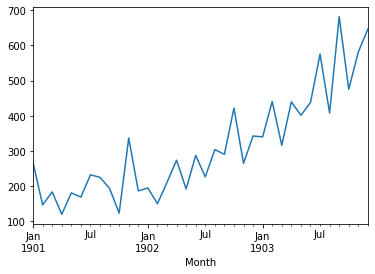

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')


series= read_csv('shampoo.csv',index_col=0, parse_dates=True, header=0, squeeze=True, date_parser=parser)
series.plot()
pyplot.show()

values=DataFrame(series.values)
dataframe= concat([values.shift(1),values],axis=1)
dataframe.columns=['t-1','t+1']
print(dataframe.head())

def predict(x):
  return x
